In [1]:
%load_ext autoreload
%autoreload 2

import torch
from model import LofiModel
from config import *
from train import train
print(torch.__version__)
print(torch.version.cuda)

2.7.1+cu118
11.8


# Config

In [2]:
model = LofiModel()
model.load_weights(r"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\big_model_pretraining\lofi_model_epoch_200.pth")
print(model)
print(f"Model has {sum(p.numel() for p in model.parameters()) / 1e6:.2f} M parameters.\n")

Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\big_model_pretraining\lofi_model_epoch_200.pth
LofiModel(
  (encoder): Encoder(
    (input_projection): Linear(in_features=128, out_features=128, bias=True)
    (lstm): LSTM(128, 512, num_layers=2, batch_first=True, bidirectional=True)
    (fc_mu): Linear(in_features=1024, out_features=512, bias=True)
    (fc_logvar): Linear(in_features=1024, out_features=512, bias=True)
  )
  (decoder): HierarchicalDecoder(
    (z_to_conductor_initial): Linear(in_features=512, out_features=2048, bias=True)
    (conductor): LSTM(1, 512, num_layers=2, batch_first=True)
    (conductor_to_decoder_initial): Linear(in_features=512, out_features=2048, bias=True)
    (decoder_rnn): LSTM(1, 512, num_layers=2, batch_first=True)
    (output_projection): Linear(in_features=512, out_features=384, bias=True)
  )
)
Model has 18.61 M parameters.



# Training

Using device: cuda

Loading dataset with sliding window...
Found 2151 MIDI files.
Processing MIDI files and extracting segments...


Processing files: 100%|██████████| 2151/2151 [00:01<00:00, 1835.92it/s]


Successfully extracted 1853 segments from 2151 files.
Splitting dataset...
Dataset split into: Train=1575, Validation=278
Finished preparing dataset.

Calculating class weights...


Analyzing dataset for weights: 100%|██████████| 99/99 [00:00<00:00, 1458.82it/s]


Calculated class weights: [0.0028789369389414787, 0.9063583016395569, 0.09076280146837234]


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/ziemmi13/lofi-vae/2d162abf55444088bc81c4c9f55d0746



-----------------------------
----- Starting training -----


Epoch 1/20 [Training]: 100%|██████████| 99/99 [00:04<00:00, 23.39it/s, Loss=6.3828, Recon=6.3419, KL=0.8173, beta=0.0500]



Epoch 1 Summary: Avg Train Loss: 5.9409, Avg Val Loss: 5.7529

Generating visualization for epoch 1:
Converting tensor to MIDI file at reconstructed.mid...
MIDI file saved successfully.


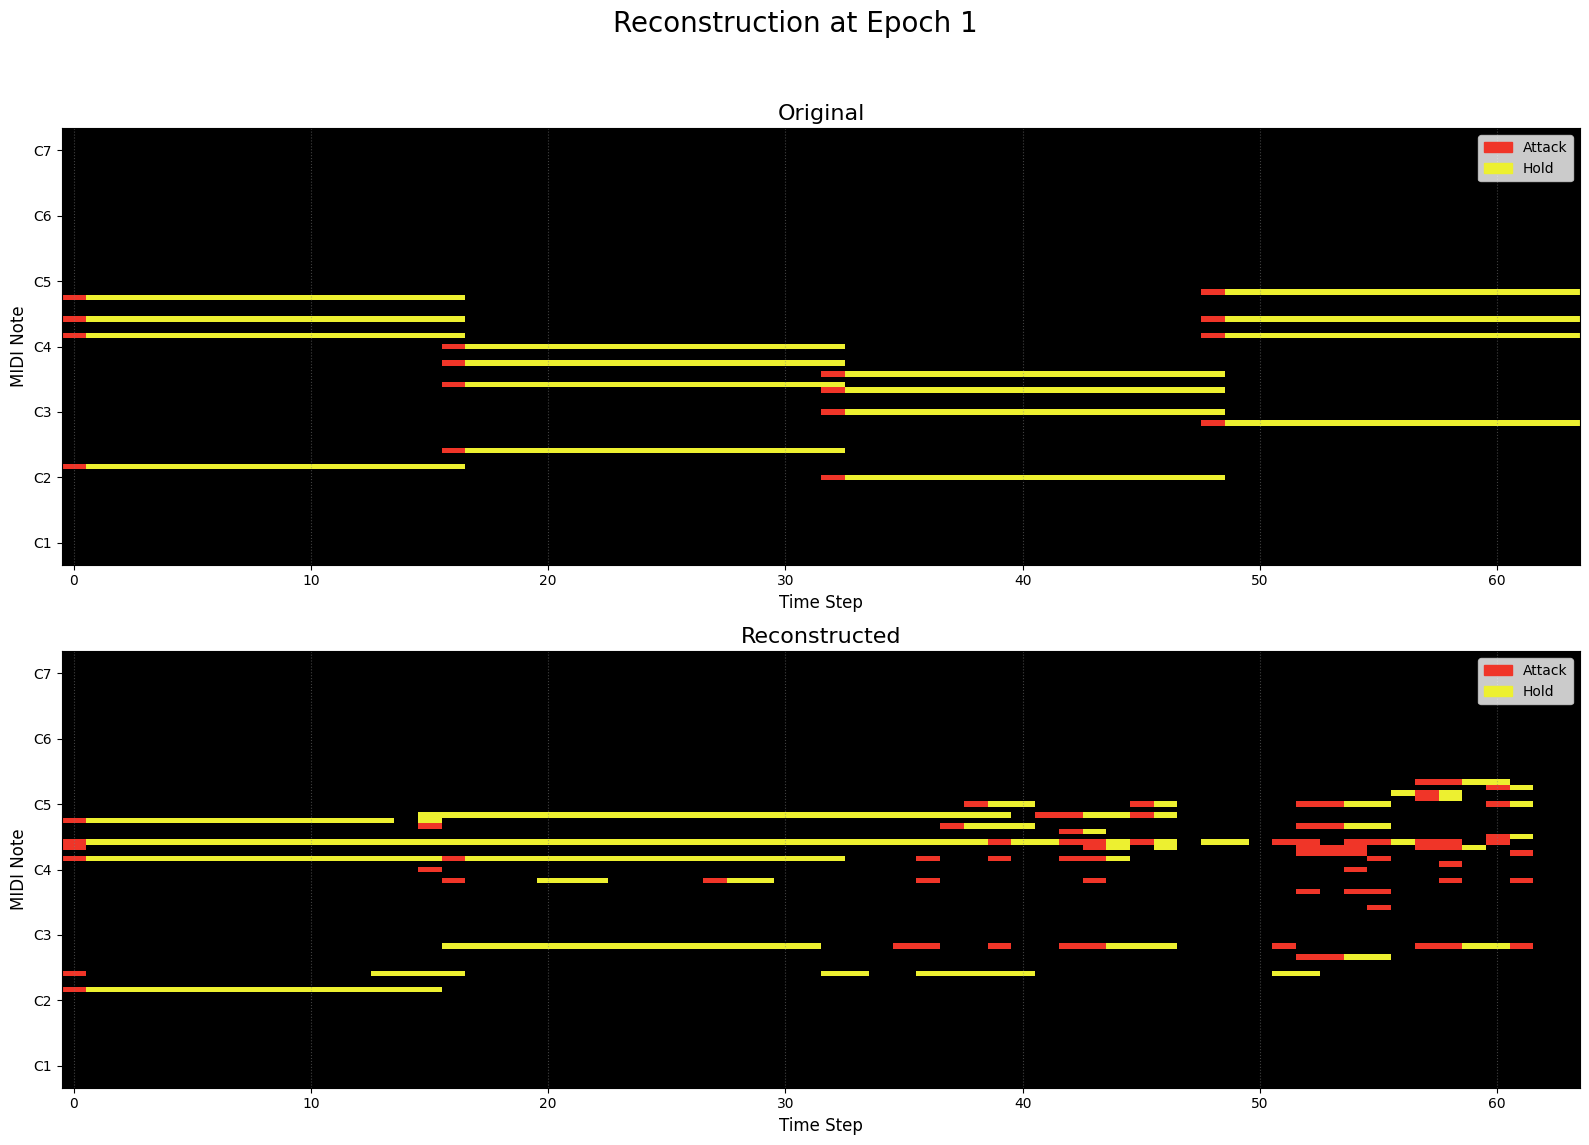

____________________________________________________________ 



Epoch 2/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 25.60it/s, Loss=6.2675, Recon=6.2253, KL=0.8439, beta=0.0500]



Epoch 2 Summary: Avg Train Loss: 5.5397, Avg Val Loss: 5.3667
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_2.pth


Epoch 3/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 26.45it/s, Loss=5.4235, Recon=5.3866, KL=0.7378, beta=0.0500]



Epoch 3 Summary: Avg Train Loss: 5.1460, Avg Val Loss: 4.9763


Epoch 4/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 26.04it/s, Loss=4.6990, Recon=4.6588, KL=0.8046, beta=0.0500]



Epoch 4 Summary: Avg Train Loss: 4.7775, Avg Val Loss: 4.6417
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_4.pth


Epoch 5/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 25.92it/s, Loss=5.1256, Recon=5.0822, KL=0.8688, beta=0.0500]



Epoch 5 Summary: Avg Train Loss: 4.4147, Avg Val Loss: 4.3045


Epoch 6/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 27.91it/s, Loss=4.2574, Recon=4.2157, KL=0.8334, beta=0.0500]



Epoch 6 Summary: Avg Train Loss: 4.1064, Avg Val Loss: 4.0329
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_6.pth


Epoch 7/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 26.88it/s, Loss=4.2623, Recon=4.2244, KL=0.7566, beta=0.0500]



Epoch 7 Summary: Avg Train Loss: 3.8167, Avg Val Loss: 3.7437


Epoch 8/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 27.13it/s, Loss=3.4426, Recon=3.4012, KL=0.8280, beta=0.0500]



Epoch 8 Summary: Avg Train Loss: 3.5337, Avg Val Loss: 3.5067
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_8.pth


Epoch 9/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 25.93it/s, Loss=3.9206, Recon=3.8745, KL=0.9201, beta=0.0500]



Epoch 9 Summary: Avg Train Loss: 3.2929, Avg Val Loss: 3.2838


Epoch 10/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 26.01it/s, Loss=2.7169, Recon=2.6773, KL=0.7921, beta=0.0500]



Epoch 10 Summary: Avg Train Loss: 3.0574, Avg Val Loss: 3.0663
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_10.pth

Generating visualization for epoch 10:
Converting tensor to MIDI file at reconstructed.mid...
MIDI file saved successfully.


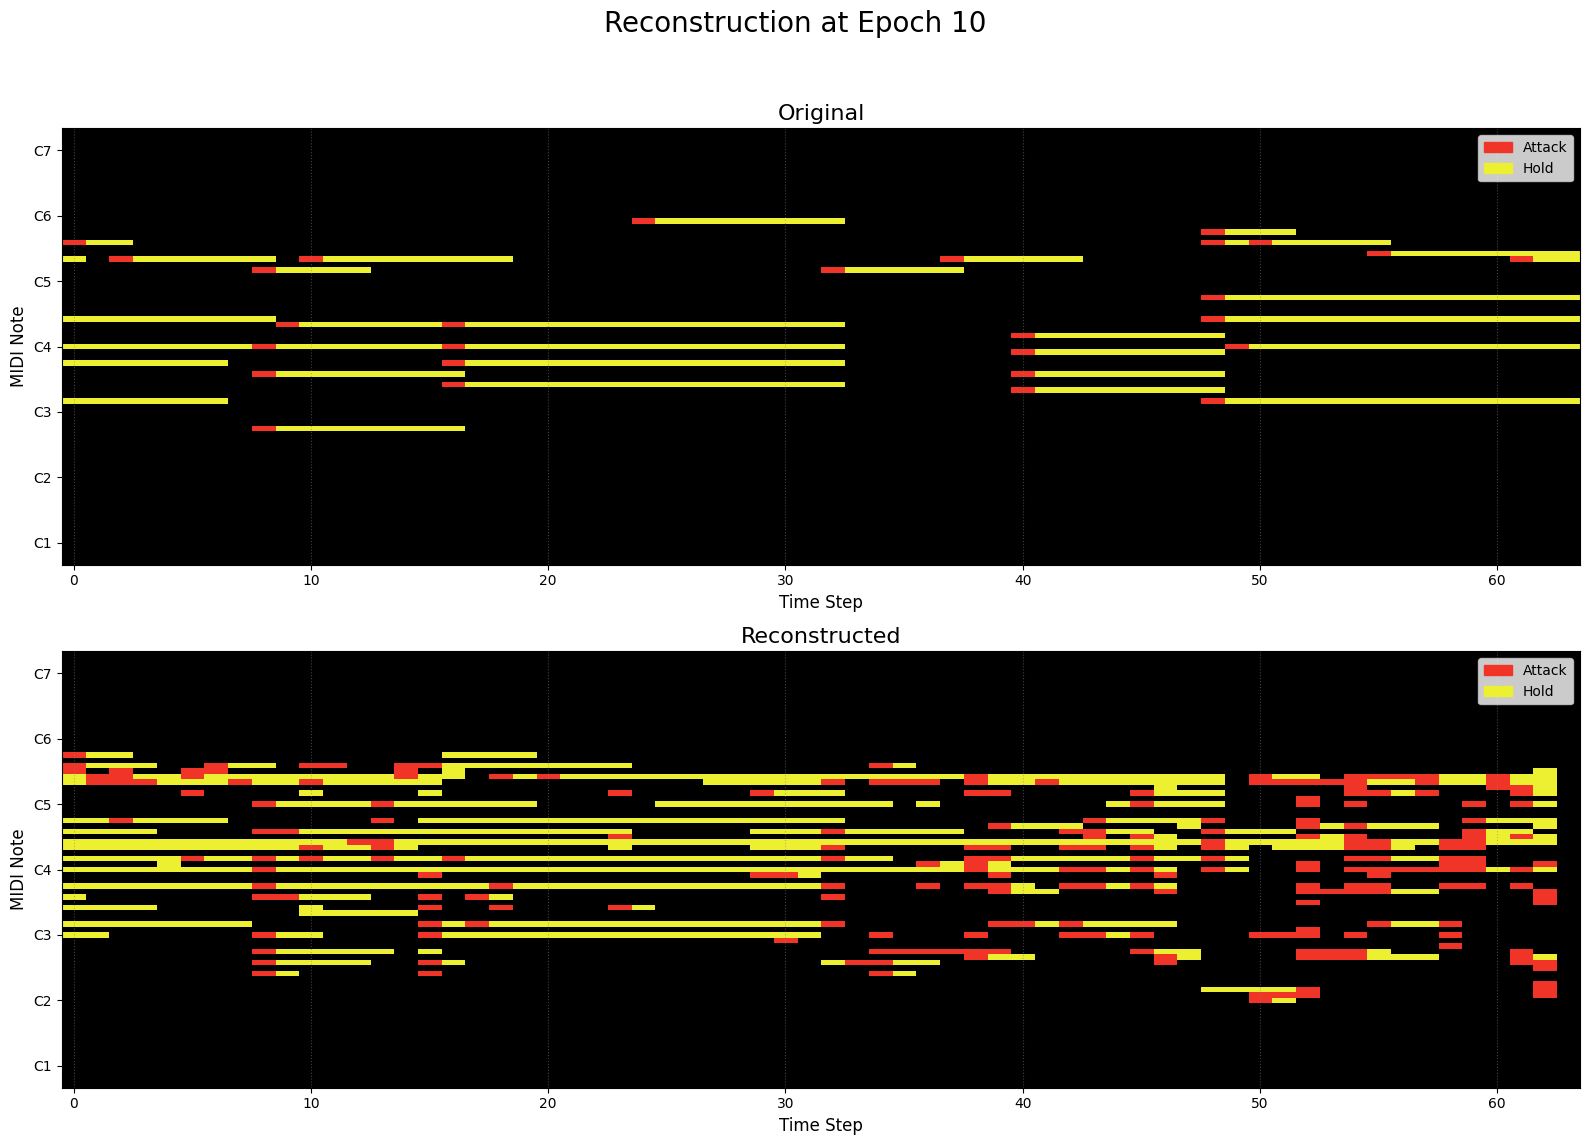

____________________________________________________________ 



Epoch 11/20 [Training]: 100%|██████████| 99/99 [00:04<00:00, 24.48it/s, Loss=4.5164, Recon=4.4768, KL=0.7907, beta=0.0500]



Epoch 11 Summary: Avg Train Loss: 2.8498, Avg Val Loss: 2.8581


Epoch 12/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 25.76it/s, Loss=3.8059, Recon=3.7680, KL=0.7583, beta=0.0500]



Epoch 12 Summary: Avg Train Loss: 2.6630, Avg Val Loss: 2.6847
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_12.pth


Epoch 13/20 [Training]: 100%|██████████| 99/99 [00:03<00:00, 24.85it/s, Loss=2.1643, Recon=2.1235, KL=0.8163, beta=0.0500]



Epoch 13 Summary: Avg Train Loss: 2.4709, Avg Val Loss: 2.5170


Epoch 14/20 [Training]: 100%|██████████| 99/99 [00:04<00:00, 23.36it/s, Loss=1.9894, Recon=1.9474, KL=0.8397, beta=0.0500]



Epoch 14 Summary: Avg Train Loss: 2.3089, Avg Val Loss: 2.3558
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_14.pth


Epoch 15/20 [Training]: 100%|██████████| 99/99 [00:04<00:00, 22.97it/s, Loss=1.8112, Recon=1.7696, KL=0.8308, beta=0.0500]



Epoch 15 Summary: Avg Train Loss: 2.1605, Avg Val Loss: 2.2114


Epoch 16/20 [Training]: 100%|██████████| 99/99 [00:04<00:00, 24.48it/s, Loss=2.2118, Recon=2.1687, KL=0.8622, beta=0.0500]



Epoch 16 Summary: Avg Train Loss: 2.0244, Avg Val Loss: 2.0868
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_16.pth


Epoch 17/20 [Training]: 100%|██████████| 99/99 [00:04<00:00, 24.59it/s, Loss=1.7038, Recon=1.6595, KL=0.8863, beta=0.0500]



Epoch 17 Summary: Avg Train Loss: 1.8995, Avg Val Loss: 1.9670


Epoch 18/20 [Training]: 100%|██████████| 99/99 [00:04<00:00, 24.42it/s, Loss=1.6586, Recon=1.6154, KL=0.8636, beta=0.0500]



Epoch 18 Summary: Avg Train Loss: 1.7812, Avg Val Loss: 1.8713
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_18.pth


Epoch 19/20 [Training]: 100%|██████████| 99/99 [00:04<00:00, 24.38it/s, Loss=1.3709, Recon=1.3239, KL=0.9399, beta=0.0500]



Epoch 19 Summary: Avg Train Loss: 1.6777, Avg Val Loss: 1.7535


Epoch 20/20 [Training]: 100%|██████████| 99/99 [00:04<00:00, 23.27it/s, Loss=1.9921, Recon=1.9506, KL=0.8302, beta=0.0500]



Epoch 20 Summary: Avg Train Loss: 1.5823, Avg Val Loss: 1.6663
Checkpoint saved to checkpoints/lofi_model\lofi_model_epoch_20.pth

Generating visualization for epoch 20:
Converting tensor to MIDI file at reconstructed.mid...
MIDI file saved successfully.


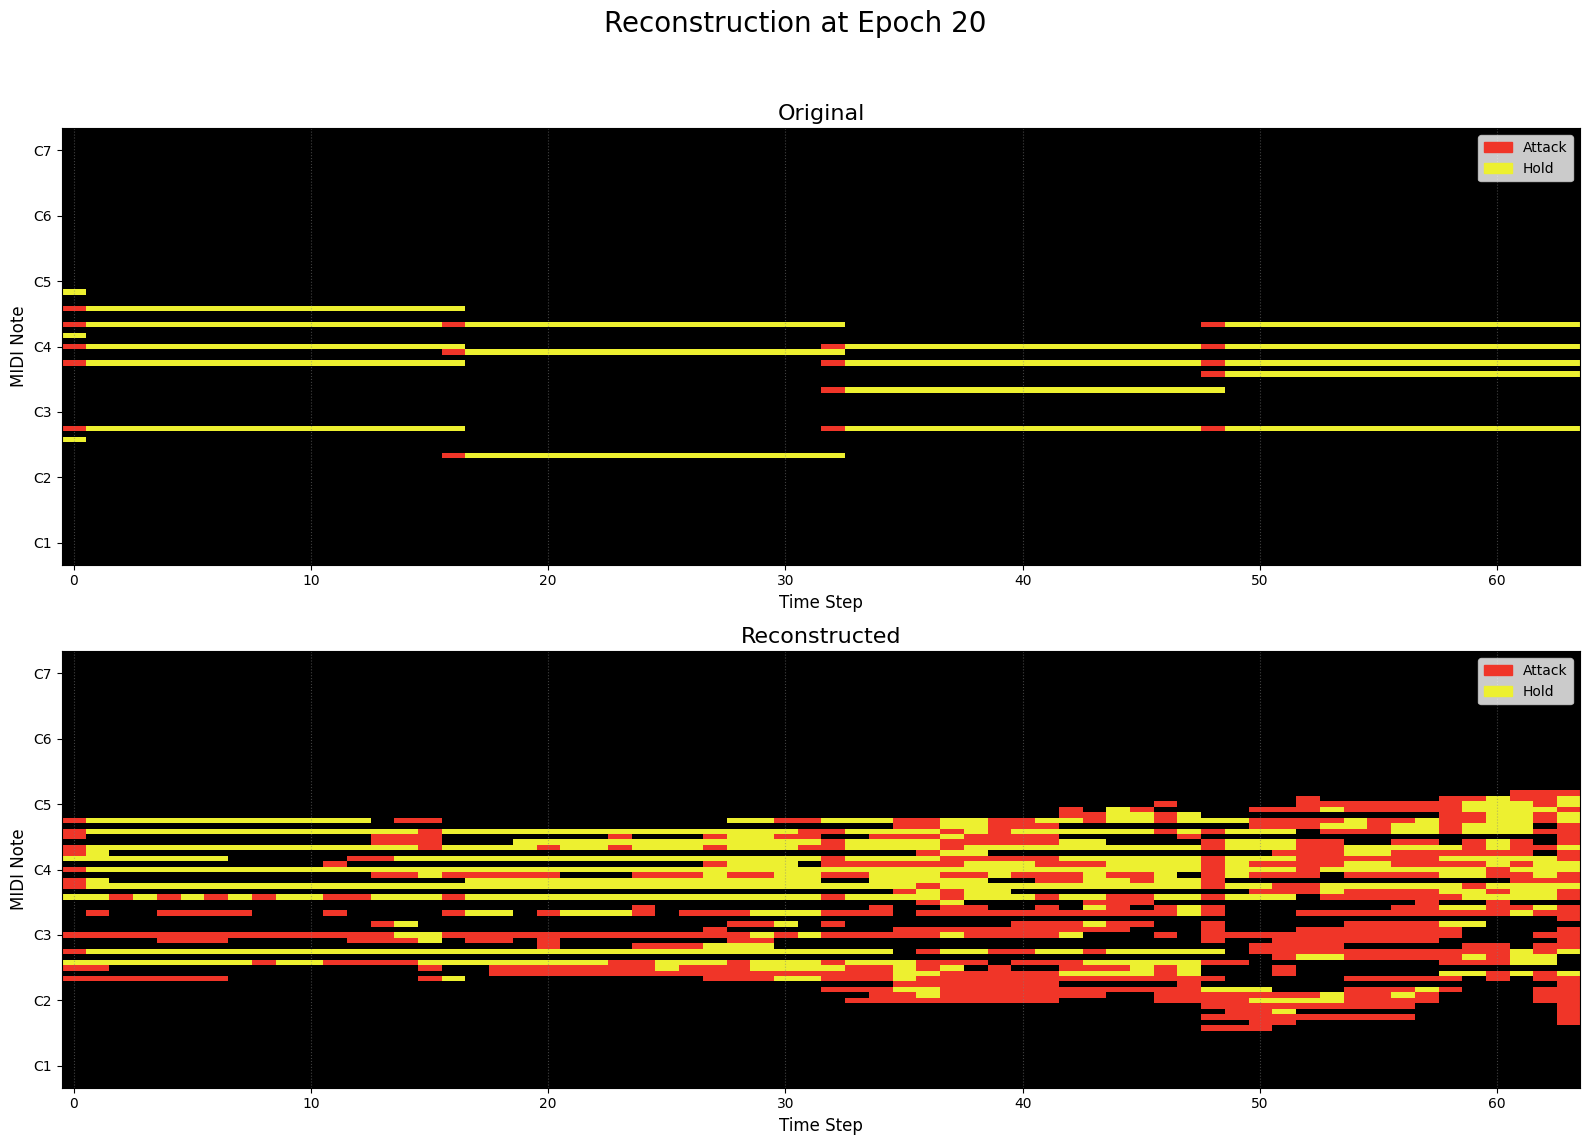

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : model lofi finetuning
COMET INFO:     url                   : https://www.comet.com/ziemmi13/lofi-vae/2d162abf55444088bc81c4c9f55d0746
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     avg_train_loss [20]     : (1.5823087186524363, 5.940853706513993)
COMET INFO:     avg_val_loss [20]       : (1.6663245227601793, 5.752942111757067)
COMET INFO:     learning_rate           : 3e-07
COMET INFO:     train_batch_loss [1980] : (1.1437848806381226, 7.02593469619751)
COMET INFO:   Others:
COMET INFO:     Name : model lofi finetuning
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 3
COMET IN

____________________________________________________________ 

Training finished.


In [3]:
train(model, experiment_name="model lofi finetuning")